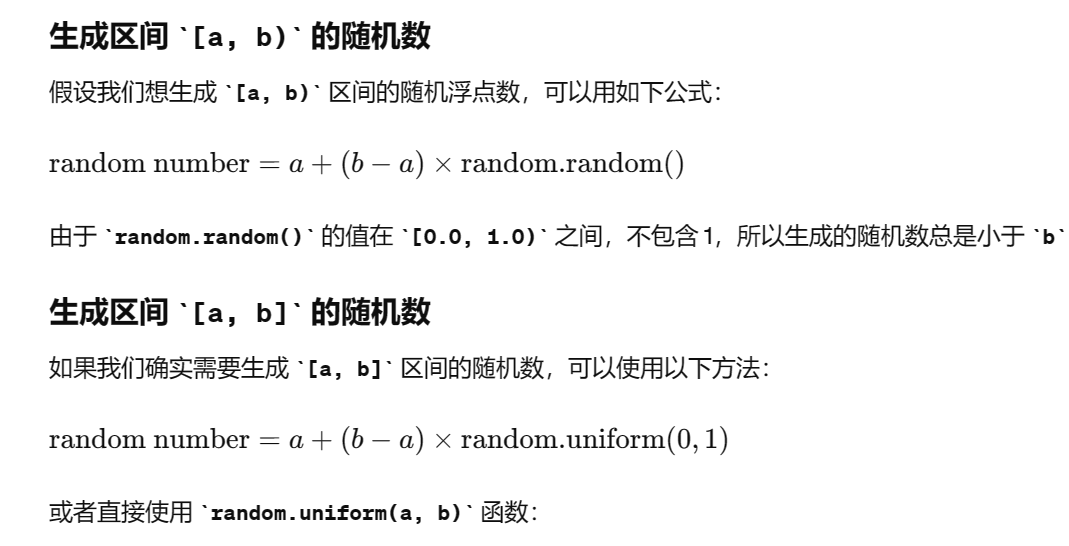

只使用 _ 作为变量名是合法的。for _ in range(num_generations):  

random.sample(list, k)  
k个随机数的list

矩阵求逆np.linalg.inv(A)  
伪逆 np.linalg.pinv(A)

[a,b): a + (b-a) *random.random() --> float  

random.random()的范围为[0, 1)  

random.randint(a, b)  --> int,contain a,b


In [ ]:
import random
# 生成一个 0 到 10 之间的随机整数，且必须是偶数（步长为2）
random_number = random.randrange(0, 10, 2)
print(random_number)  # 输出示例: 6

`np.arange(size)` 创建了一个从 0 到 size-1 的整数数组。然后，`[::-1]` 是Python中的切片语法，表示逆序排列数组。因此，`np.arange(size)[::-1]` 的作用是生成一个从 `size-1` 到 0 的整数数组。

例如，如果 DNA_SIZE 是 5，那么 `np.arange(size)` 将生成数组 `[0, 1, 2, 3, 4]`，而 `np.arange(size)[::-1]` 将生成数组 `[4, 3, 2, 1, 0]`

或者使用`np.random.uniform(1, 2, 1)`生成1(第三个参数)个$[1,2)$的数


In [ ]:
import numpy as np

D = 2  # 变量维数

PreX = np.zeros(shape=(D,1))
PreX[0] = np.random.uniform(1, 2, 1)  # X范围【1,2】
PreX[1] = np.random.uniform(-1, 0, 1)  # y范围【-1,0】

print(PreX)


### 深浅拷贝与赋值
1. 赋值  
    简单地拷贝对象的引用，两个对象的id相同，只是复制了指针，指向同一个内存地址  
    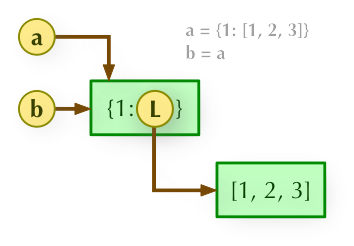
2. 浅拷贝
   创建一个新的组合对象，这个新对象与原对象共享内存中的子对象  
   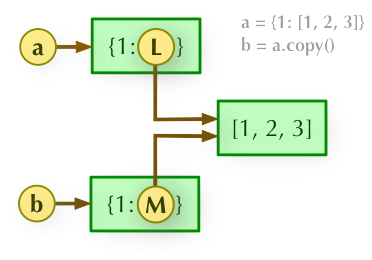    
3. 深拷贝  
    创建一个新的组合对象，同时递归地拷贝所有子对象，新的组合对象与原对象没有任何关联。虽然实际上会共享不可变的子对象，但不影响它们的相互独立性  
    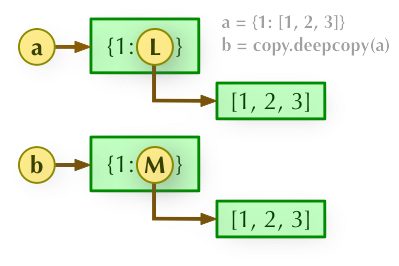  
4. 列表切片等价于深复制
5. '='等价于浅复制

In [ ]:
# '='->浅复制
list1 = [1,2,[3,4]]
list2 = list1
list1.append(5)
print(list1)
# [1, 2, [3, 4], 5]
print(list2)
# [1, 2, [3, 4], 5]
list1[2].remove(3)
print(list1)
# [1, 2, [4], 5]
print(list2)
# [1, 2, [4], 5]


In [ ]:
# 切片操作->深复制
list1 = [1,2,[3,4]]
list2 = list1[:]
list1.append(5)
print(list1)
# [1, 2, [3, 4], 5]
print(list2)
# [1, 2, [3, 4]]
list1[2].remove(3)
print(list1)
# [1, 2, [4], 5]
print(list2)
# [1, 2, [4]]


#### list与array的区别
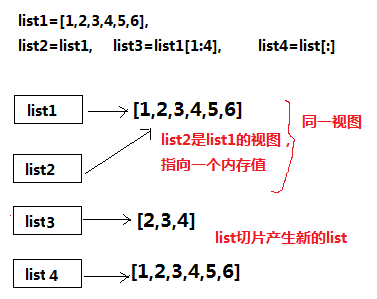  
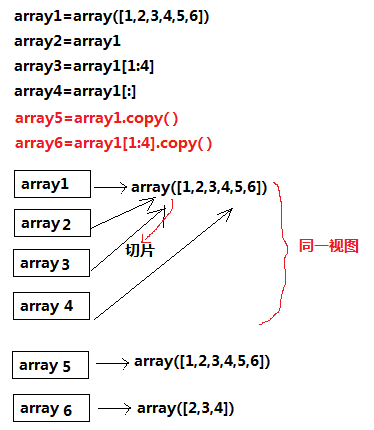  

In [ ]:
# 浅拷贝&深拷贝
import copy
from copy import deepcopy

origin = [1,2,[3,4]]
# origin里面有三个元素，1,2,[3,4]
copy1 = copy.copy(origin)
copy2 = deepcopy(origin)
print(copy1 == copy2)   # True
print(copy1 is copy2)   # False
# copy1 和copy2看上去相同，但已经不是同一个object
origin[2][0] = "hey!"
print(origin)   # [1, 2, ['hey!', 4]]
print(copy1)    # [1, 2, ['hey!', 4]]
print(copy2)    # [1, 2, [3, 4]]

### 全局变量与global关键词
#### 全局变量
1. 全局可访问性  
2. 全局变量的作用域是整个程序文件，在函数内部，如果没有使用global关键字，可以对全局变量进行访问，但是不能修改。-> 函数内对全局变量只访问不能修改  

In [ ]:
count = 0
def  func():
    count+=1
    print(count)
func()
'''
上述代码会报错：
Traceback (most recent call last):
  File "xxxx", line 8, in <module>
    func()
  File "xxxx", line 5, in func
    count+=1
    ^^^^^
UnboundLocalError: cannot access local variable 'count' where it is not associated with a value
UnboundLocalError: local variable 'count' referenced before assignment
分析：上述代码中，我们在函数func中对全局变量count进行修改，会报错。
在函数func中，python认为count是一个局部变量'''

In [ ]:
count = 0
def func():
    count = 0
    count+=1
    print("func:",count)
    print('func_id:',id(count))
func()
print(count)
print('gobal:',id(count))
'''
代码输出：
func: 1
0
分析：在函数中func中，对count进行修改，count是函数内的一个变量，在函数调用时产生，调用完后销毁。
和函数外定义的count不太，变量名相同但id地址不同，这样的变量命名与使用是合法的，有时候还很方便。

'''


#### 使用gobal关键字在函数内部声明全局变量
1. `global`关键字只能在函数内使用  
2. 使用`global`关键字声明的变量在函数内部和函数外部具有相同的作用域，整个程序文件  
3. 如果在函数内部使用`global`关键字来声明变量，而在函数外部没有声明相同的变量，python会创建一个新的全局变量->if外部未定义而内部定义`global`，会自动在外部定义  

#### 总结

1. 只在必要时使用`global`，只有真正在函数内部修改全局变量时，才应该使用`global`
**创建类.如果参数之间的联系不是很强，可以考虑嵌套函数，或者把变量当参数传进去**

In [ ]:
def a():
    return 1
def b():
    return a()+1
print(b())

numpy对象转换  
tem_pop = []  
tem_pop = np.array(tem_pop)

### 各种索引方法
1. max_index = np.argmax(fitness)  ->min is okay  
2. axis = 0  按行计算，得到列的性质  
3. axis = 1  按列计算，得到行的性质  
4. 

#### and与&的区别
1. and：逻辑与  
当且仅当所有条件都为真时，结果才为真。  
2. &：按位与  
位运算符，是按位进行逻辑运算，将操作数转化为对应的的二进制进行逻辑运算(这个操作是对两个数字的每一位进行比较，只有当两个相应的位都为1时，结果位才为1)，运算结果再转化为原来的进制(十进制)  
如果二进制字符串长度不相等，以短的为准。  

```   
    c = 5 & 3 结果是 1，
    因为 5 的二进制表示是 101，3 的二进制表示是 011，
    只有最低位的 1 和 1 是相同的，所以结果是 1
    2&3, 2对应的二进制为10,3对应的二进制为11，
    按位运算1and1为1,0and1为0，结果为10，结果返回2
```


```python
# 将整个数组的第 i 行和第 k+1 列的第 0 和 1 维度的值限制在 v_min 和 v_max 之间
import numpy as np
allind_v[i, k+1, :2] = np.clip(allind_v[i, k+1, :2], v_min, v_max)
```
左闭右闭

In [ ]:
# 一重积分
import sympy as sp
h = 2.74
g = 9.8
t = (2* h/ g)**0.5
x = sp.symbols('x')
ans =  sp.integrate(2.44 +1.22*x - g*x, (x,0,t))


In [ ]:
import numpy as np
g = 9.8
m1 = 0.0056
m2 = 2
v0 = 501
s = 0.5

v1 = m1/(m1+m2)*v0
print('v1 = ',v1)
u = (m1/(m1+m2)*v0)**2 / (2*g*s)
print('u = ',u)
W1 = 0.5 * m1*v1**2 - 0.5 * m2*v0**2
W2 = 0.5 * m2 *v1**2
print('W1 = ',W1)
print('W2 = ',W2)